# Telco Platform Engineering Security Operations <br> AI Insights Generation with Fine Tuning of Meta's BART Model
Author: Fatih E. NAR <br>
This project aims to deliver a security risk factor insights <br>
Model Card: https://huggingface.co/google-t5/t5-small <br>

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import onnxmltools
from skl2onnx.common.data_types import FloatTensorType


# Load the data
# why did we use parquet format? Cos we love to complicate stuff. Just kidding. 
# Parquet is a columnar storage format that is optimized for reading and writing data. 
# And it is a good choice for storing large datasets.
data = pd.read_parquet('5G_SecOps_Data_10K.parquet')

# Preprocess the data
def preprocess_data(data):
    # Convert categorical variables to numeric
    data['Service Configurations'] = data['Service Configurations'].map({'Poor': 0, 'Medium': 1, 'Good': 2})
    data['Service Reachability'] = data['Service Reachability'].map({'Internal': 0, 'External': 1})
    data['RBAC Configuration'] = data['RBAC Configuration'].map({'Low': 0, 'Medium': 1, 'High': 2})
    # Drop non-numeric columns
    data = data.drop(columns=['Cluster', 'Namespace'])
    return data

data = preprocess_data(data)

# Define features and target
X = data.drop(columns=['Risk Score'])
y = data['Risk Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train the XGBoost model with GPU support
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    #tree_method='gpu_hist'  # Use GPU for training if you have NVIDIA
    tree_method='hist'  # Use histogram-based algorithm for CPU
)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [4]:
# Predict the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.08717062390586182
Mean Absolute Error: 0.20328673958778382
R^2 Score: 0.9996172891957273


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Risk Score', ylabel='Count'>

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Residuals')

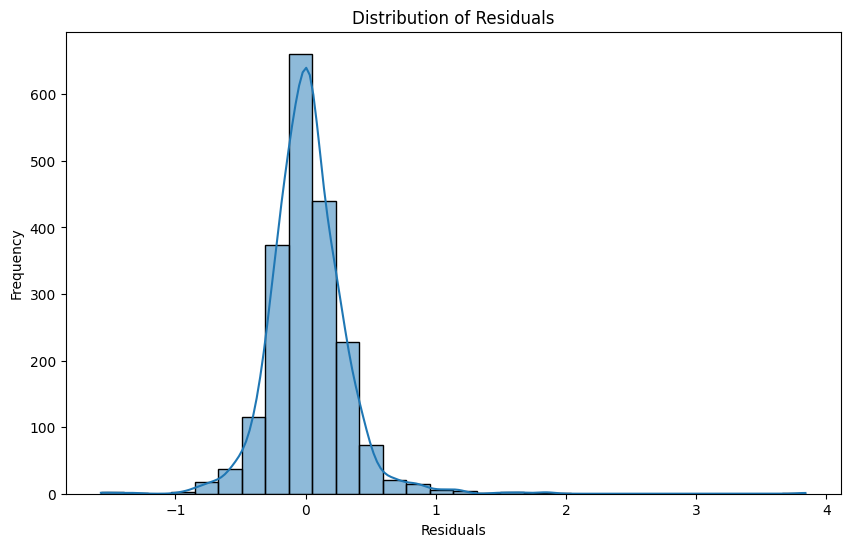

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Risk Score'>

Text(0.5, 0, 'Actual Risk Scores')

Text(0, 0.5, 'Predicted Risk Scores')

Text(0.5, 1.0, 'Actual vs. Predicted Risk Scores')

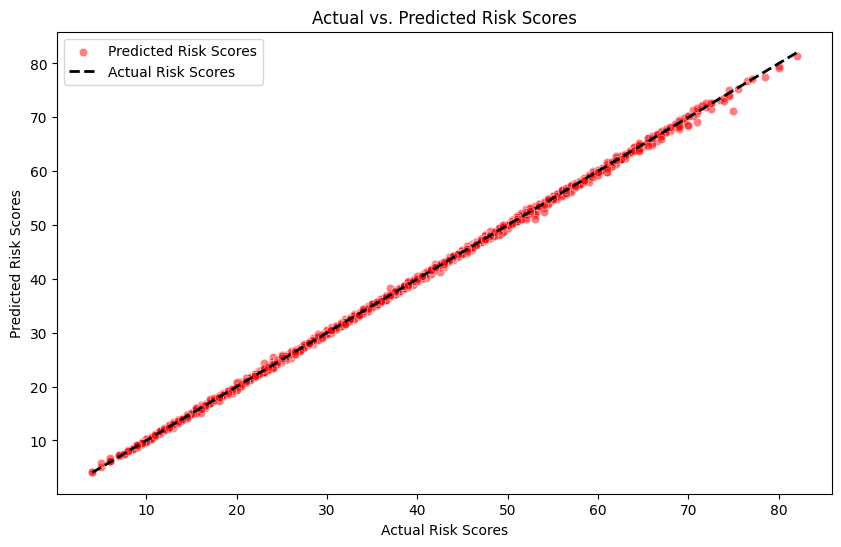

<Figure size 1200x800 with 0 Axes>

/var/folders/65/_h12pmms6437xks9bqgryp300000gn/T/ipykernel_59483/1669763739.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()), palette=colors)
/var/folders/65/_h12pmms6437xks9bqgryp300000gn/T/ipykernel_59483/1669763739.py:30: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()), palette=colors)


<Axes: >

Text(0.5, 1.0, 'Feature Importance')

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Features')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

Text(0.03565564751625061, 0, '3.57%')

Text(0.0, 1, '0.00%')

Text(0.04746857285499573, 2, '4.75%')

Text(0.000443982396973297, 3, '0.04%')

Text(0.023362822830677032, 4, '2.34%')

Text(0.00023248788784258068, 5, '0.02%')

Text(0.001444657682441175, 6, '0.14%')

Text(0.0, 7, '0.00%')

Text(0.0, 8, '0.00%')

Text(0.8321758508682251, 9, '83.22%')

Text(0.03106251358985901, 10, '3.11%')

Text(0.001954247010871768, 11, '0.20%')

Text(0.0, 12, '0.00%')

Text(0.025510720908641815, 13, '2.55%')

Text(0.0002656578435562551, 14, '0.03%')

Text(0.00024741629022173584, 15, '0.02%')

Text(0.00017545495938975364, 16, '0.02%')

Text(0.0, 17, '0.00%')

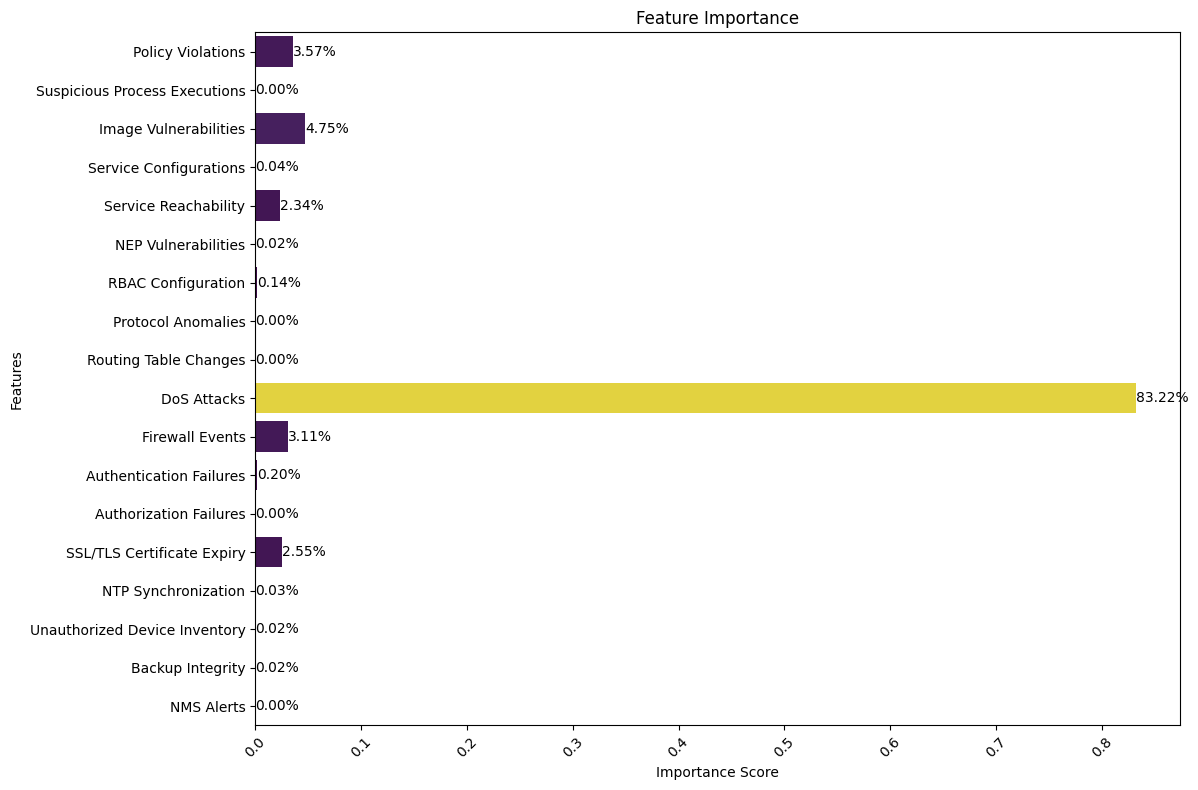

In [5]:
# Distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='red', label='Predicted Risk Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual Risk Scores')
plt.xlabel('Actual Risk Scores')
plt.ylabel('Predicted Risk Scores')
plt.title('Actual vs. Predicted Risk Scores')
plt.legend(loc='upper left')
plt.show()

# Feature importance with color gradient and percentage annotations
feature_names = X.columns.tolist()
importance = xgb_model.feature_importances_
importance_dict = {name: score for name, score in zip(feature_names, importance)}

# Create a color palette
norm = plt.Normalize(min(importance_dict.values()), max(importance_dict.values()))
colors = plt.cm.viridis(norm(list(importance_dict.values())))

plt.figure(figsize=(12, 8))
sns.barplot(x=list(importance_dict.values()), y=list(importance_dict.keys()), palette=colors)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentage annotations
for i, (name, value) in enumerate(importance_dict.items()):
    plt.text(value, i, f'{value * 100:.2f}%', ha='left', va='center')

plt.show()

In [ ]:
# Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = onnxmltools.convert_xgboost(xgb_model, initial_types=initial_type)

# Save the ONNX model
onnx_model_path = 'model/xgb_risk_score_model.onnx'
with open(onnx_model_path, 'wb') as f:
    f.write(onnx_model.SerializeToString())

print(f"XGBoost model saved to {onnx_model_path}")